# Time Series Analysis

Using a different time series data set (either from [FRED](https://fred.stlouisfed.org/) or elsewhere, go about the process of time series modeling. Specifically generate the following things:

1. Plot the time series, along with any logical or necessary differences to get a stationary dataset
2. Generate and interpret a PACF for the time series (and/or its differences)
3. Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
4. Finally choose one specification and make the case for that as a logical model for your dataset.

This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from sklearn import linear_model

from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
raw_data = pd.read_csv('~/src/data/fredData/dcoilwtico.csv')
raw_data.iloc[:10]

,DCOILWTICO,Unnamed: 1
0,lin,Dollars per Barrel
1,D,Daily
2,01/01/1900,1986-01-02 to 2019-04-01
3,Crude Oil Prices: West Texas Intermediate (WTI...,NaN
4,U.S. Energy Information Administration,NaN
5,date,value
6,01/02/1986,25.6
7,01/03/1986,26.0
8,01/06/1986,26.5
9,01/07/1986,25.9


In [3]:
raw_data.head()

,DCOILWTICO,Unnamed: 1
0,lin,Dollars per Barrel
1,D,Daily
2,01/01/1900,1986-01-02 to 2019-04-01
3,Crude Oil Prices: West Texas Intermediate (WTI...,NaN
4,U.S. Energy Information Administration,NaN


In [4]:
df = raw_data.drop([0, 1, 2, 3, 4 ,5])
df = df.reset_index(drop=True)
df = df.rename(columns={"DCOILWTICO": "date", "Unnamed: 1": "value"})
df.head()

,date,value
0,01/02/1986,25.6
1,01/03/1986,26.0
2,01/06/1986,26.5
3,01/07/1986,25.9
4,01/08/1986,25.9


In [5]:
df.dtypes

date     object
value    object
dtype: object

In [6]:
df.isnull().sum()

date       0
value    292
dtype: int64

In [7]:
# Convert oil price to a number, with coersion to throw NA's if conversion not possible.
df['price'] = pd.to_numeric(df.value, errors = 'coerce')

# Remove NA's.
df.dropna(inplace = True)

# Create date-based index.
df.index = pd.to_datetime(df.date)

# Removing "value".
df = df.drop(['value'], axis = 1)

# View.
df.head()

,date,price
date,,
1986-01-02,01/02/1986,25.6
1986-01-03,01/03/1986,26.0
1986-01-06,01/06/1986,26.5
1986-01-07,01/07/1986,25.9
1986-01-08,01/08/1986,25.9


In [8]:
df.dtypes

date      object
price    float64
dtype: object

## Viewing our data

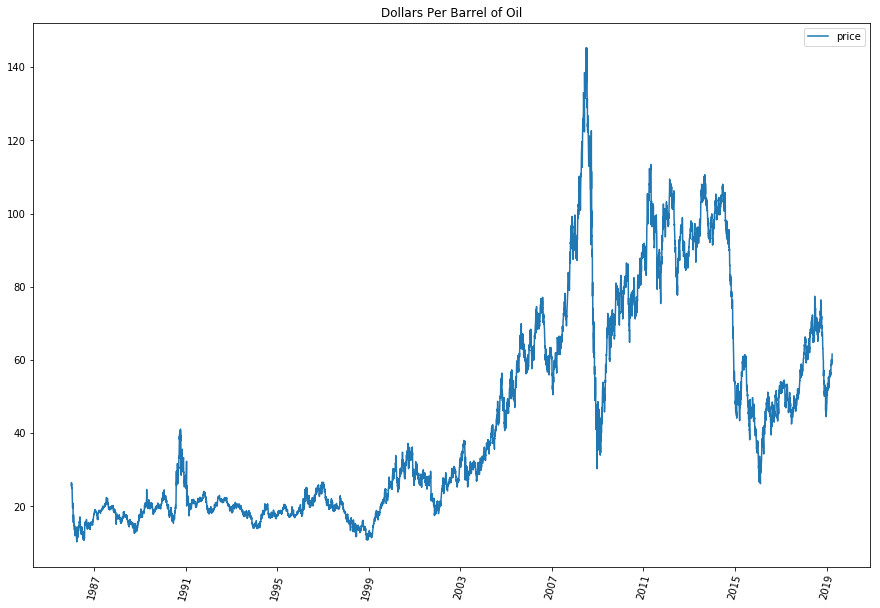

In [9]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.plot(df.index, df.price, '-')
plt.xticks(rotation=75)
plt.title('Dollars Per Barrel of Oil')
plt.legend()
plt.show()

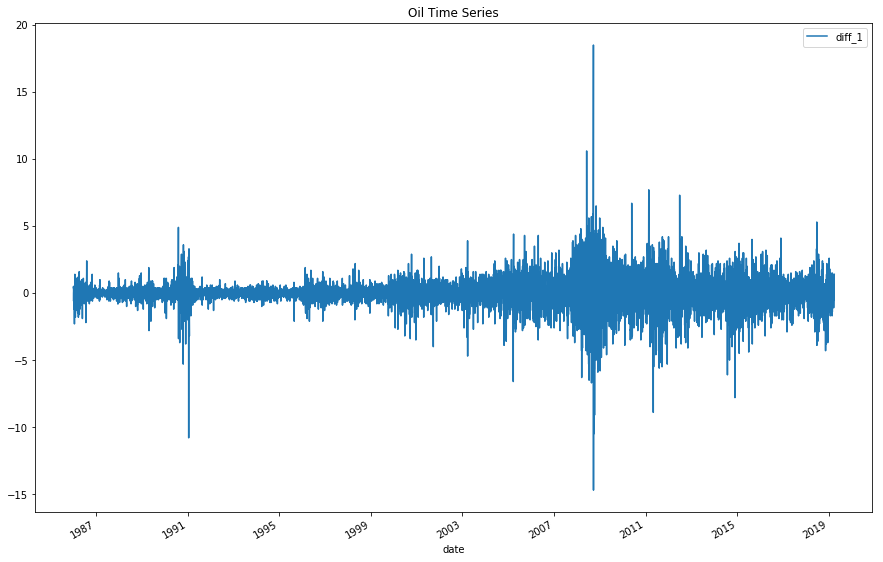

In [10]:
plt.rcParams['figure.figsize'] = (15, 10)
df['diff_1'] = df.price - df.price.shift()
df.plot(y='diff_1')
plt.title('Oil Time Series')
plt.show()

## ACF: AutoCorrelation Function

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if __name__ == '__main__':


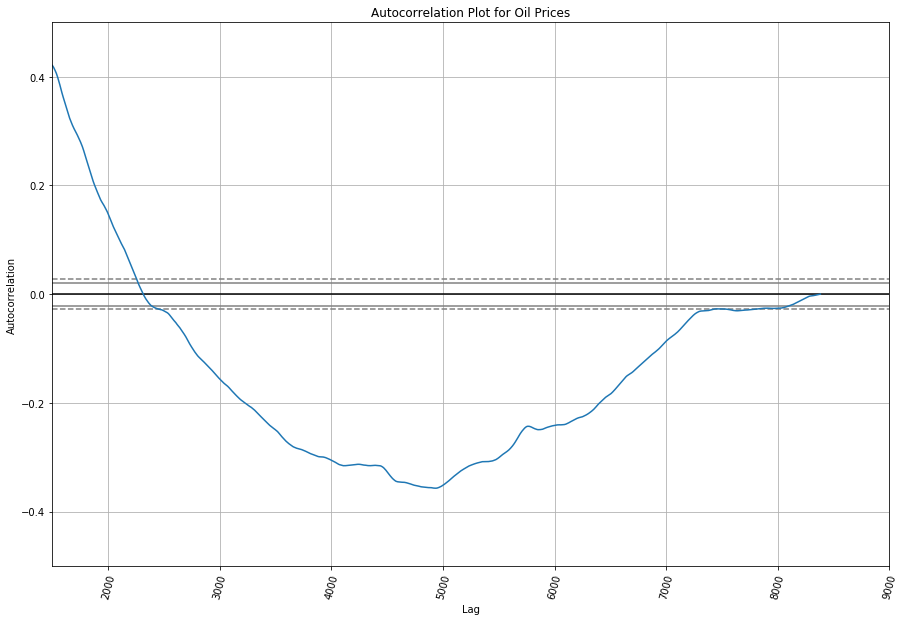

In [11]:
# Autocorrelation plot.
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

"""Autocorrelation plots used for checking randomness in time series. If time series is random,
 such autocorrelations should be near zero for any and all time-lag separations. If time series
 is non-random then one or more of the autocorrelations will be significantly non-zero."""

from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['price'])
plt.title("Autocorrelation Plot for Oil Prices")
plt.xlim(1500, 9000)
plt.ylim(-0.5, 0.5)
plt.xticks(rotation=75)
plt.show()

Dashed line is 99% confidence band, whereas grey lines are 95%. The higher the Lag, the more non-zero autocorrelations are present (see around ~8300), implying this aspect of our time series data is non-random. 

p-value == ~ 2300

## PACF: Partial AutoCorrelation Function

Text(0.5,1,'Oil PACF')

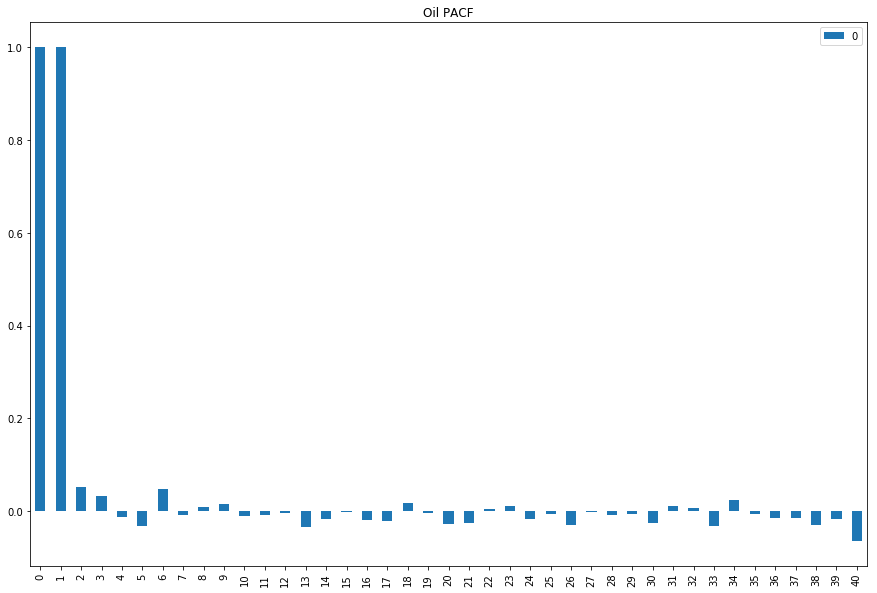

In [16]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.price))
x_acf.plot(kind='bar')
plt.title("Oil PACF")

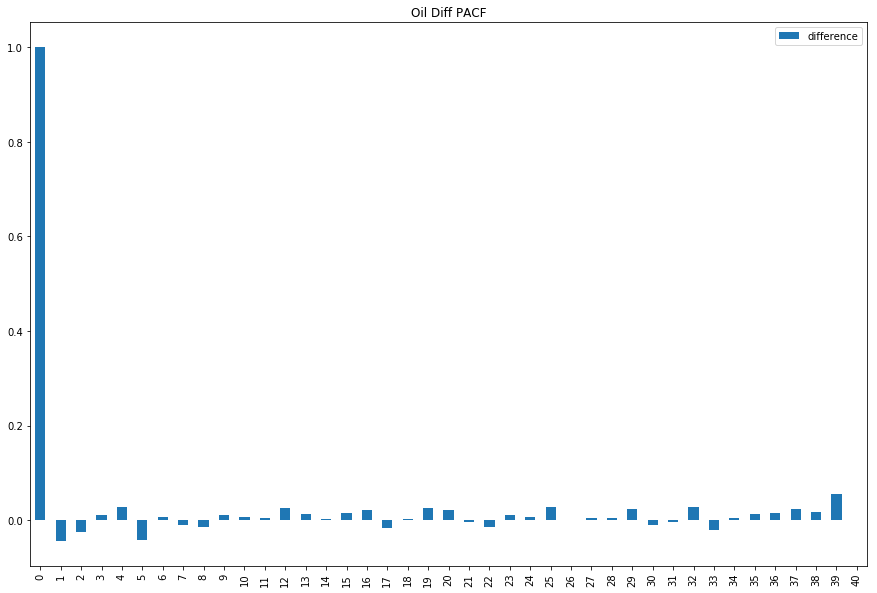

In [20]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:])) #as first indexed val is NaN due to lag
x_acf.plot(kind='bar')
plt.title("Oil Diff PACF")
plt.legend(['difference'])

## ARIMA (0, 1, 0)

In [40]:
def run_arima(a, b, c, vals):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(vals, order=(a, b, c))
    model_fit = model.fit()
    summary = model_fit.summary()
    residuals = model_fit.resid.describe()
    print(summary)
    print('Residuals Description:')
    print(residuals)

In [45]:
import itertools

##itertools.permutations##
##itertools.combinations##

run_arima(0, 0, 0, df.price)
run_arima(0, 0, 1, df.price)
run_arima(0, 0, 2, df.price)
run_arima(1, 0, 0, df.price)
run_arima(1, 1, 0, df.price)

run_arima(0, 1, 2, df.price)
run_arima(0, 2, 1, df.price)
run_arima(1, 0, 2, df.price)
run_arima(1, 2, 0, df.price)
run_arima(2, 0, 1, df.price)
run_arima(2, 1, 0, df.price)

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as a

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 8381
Model:                     ARMA(0, 0)   Log Likelihood              -40245.242
Method:                           css   S.D. of innovations             29.460
Date:                Tue, 09 Apr 2019   AIC                          80494.484
Time:                        19:59:32   BIC                          80508.551
Sample:                             0   HQIC                         80499.288
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8616      0.322    136.303      0.000      43.231      44.492
Residuals Description:
count    8.381000e+03
mean    -1.752576e-14
std      2.946146e+01
min     -3.356163e+01
25%     -2.426163e+0

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 8381
Model:                     ARMA(0, 2)   Log Likelihood              -30024.159
Method:                       css-mle   S.D. of innovations              8.699
Date:                Tue, 09 Apr 2019   AIC                          60056.318
Time:                        19:59:33   BIC                          60084.452
Sample:                             0   HQIC                         60065.925
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          43.8616      0.341    128.735      0.000      43.194      44.529
ma.L1.price     1.6848      0.005    329.644      0.000       1.675       1.695
ma.L2.price     0.9014      0.004    248.450    

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 8381
Model:                     ARMA(1, 0)   Log Likelihood              -13040.360
Method:                       css-mle   S.D. of innovations              1.146
Date:                Tue, 09 Apr 2019   AIC                          26086.720
Time:                        19:59:33   BIC                          26107.822
Sample:                             0   HQIC                         26093.926
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          43.7961     13.403      3.268      0.001      17.528      70.065
ar.L1.price     0.9992      0.000   2502.484      0.000       0.998       1.000
                                    Roots       

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\s

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 8380
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -13026.502
Method:                       css-mle   S.D. of innovations              1.145
Date:                Tue, 09 Apr 2019   AIC                          26061.005
Time:                        19:59:33   BIC                          26089.139
Sample:                             1   HQIC                         26070.612
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0043      0.012      0.367      0.714      -0.019       0.027
ma.L1.D.price    -0.0454      0.011     -4.153      0.000      -0.067      -0.024
ma.L2.D.price    -0.0217      0.011     

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                 8379
Model:                 ARIMA(0, 2, 1)   Log Likelihood              -13040.876
Method:                       css-mle   S.D. of innovations              1.147
Date:                Tue, 09 Apr 2019   AIC                          26087.751
Time:                        19:59:35   BIC                          26108.852
Sample:                             2   HQIC                         26094.957
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.727e-08   5.18e-06     -0.009      0.993   -1.02e-05    1.01e-05
ma.L1.D2.price    -1.0000      0.000  -2892.334      0.000      -1.001      -0.999
                                    

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 8381
Model:                     ARMA(1, 2)   Log Likelihood              -13029.662
Method:                       css-mle   S.D. of innovations              1.145
Date:                Tue, 09 Apr 2019   AIC                          26069.325
Time:                        19:59:37   BIC                          26104.494
Sample:                             0   HQIC                         26081.335
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          43.7926     14.005      3.127      0.002      16.343      71.242
ar.L1.price     0.9993      0.000   2699.643      0.000       0.999       1.000
ma.L1.price    -0.0450      0.011     -4.119    

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 8381
Model:                     ARMA(2, 1)   Log Likelihood              -13030.558
Method:                       css-mle   S.D. of innovations              1.145
Date:                Tue, 09 Apr 2019   AIC                          26071.116
Time:                        19:59:39   BIC                          26106.284
Sample:                             0   HQIC                         26083.125
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          43.7682     13.964      3.134      0.002      16.399      71.138
ar.L1.price     1.2415      0.040     30.876      0.000       1.163       1.320
ar.L2.price    -0.2420      0.040     -6.024    

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [47]:
import itertools
print(list(itertools.permutations([0, 1, 2], 3)))
print(list(itertools.combinations([0, 1, 2], 3)))

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]
[(0, 1, 2)]


In [39]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 8380
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -13037.413
Method:                           css   S.D. of innovations              1.147
Date:                Tue, 09 Apr 2019   AIC                          26078.827
Time:                        19:54:57   BIC                          26092.894
Sample:                             1   HQIC                         26083.630
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.013      0.343      0.732      -0.020       0.029
Residuals Description
count    8.380000e+03
mean     6.910418e-13
std      1.146712e+00
min     -1.470430e+01
25%     -4.042959e-01

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  